## Question 1

Create side-by-side boxplots for the number of mosquitoes in each group (beer vs water)


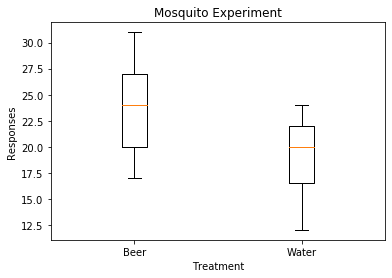

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Import the assignement csv file and store it 
with open('mosquitos_data-2.csv', 'r') as exp_data:
    data_reader= csv.DictReader(exp_data)
    
    
    responses=[]
# Storing the all the data points as list     
    for line in data_reader:
        responses.append(int(line['Response']))
        
beer=responses[:25]
water=responses[25:]

x0=plt.subplot()
x0.boxplot([beer,water])
plt.xlabel('Treatment')
plt.ylabel('Responses')
x0.set_xticklabels(['Beer', 'Water'])
x0.set_title("Mosquito Experiment")
print("")


## Question 2

What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitoes?


ANSWER: The graph shows that there is some significant different betweeen the two sets of data for beer and water from the experiment. Based on the higher number of mosquitos bites from beer data as it shows on the graph, consuption of beer is more attractive to mosquitos.  

## Question 3

Calculate basic statistics measures for each group: the mean, median, standard deviation and explain the numbers.


In [3]:
print("The mean for beer data is:", np.mean(beer))
print("The median for beer data is:", np.median(beer))
print("The standard deviation for beer data is:", round(np.std(beer),2))


print("The mean for water data is:", round(np.mean(water)))
print("The median for water data is:", np.median(water))
print("The standard deviation for water data is:", round(np.std(water),2))

The mean for beer data is: 23.6
The median for beer data is: 24.0
The standard deviation for beer data is: 4.05
The mean for water data is: 19.0
The median for water data is: 20.0
The standard deviation for water data is: 3.57


## Question 4

Write the code to implement the data simulation demonstrated in the above mentioned video. Calculate the probability of obtaining the experiment outcome.

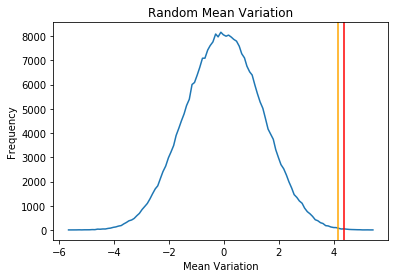

In [44]:
# Shuffling the data 300,000 times to collect as many possible variances
v_t=[]
for i in range(300000):
    t1=np.concatenate((beer,water), axis=0)
    sh=np.random.shuffle(t1)
    beer_1= t1[:25]
    water_1= t1[25:]
    beer_m=np.mean(beer_1)
    water_m=np.mean(water_1)
    v_t=np.append(v_t,(round(beer_m-water_m,2)))

# Frequency of values collected from 300,000 iterations
variance, counts=(np.unique(v_t, return_counts=True))

plt.plot(variance, counts)
plt.title('Random Mean Variation')
plt.xlabel('Mean Variation')
plt.ylabel('Frequency')
# plot the third deviation from the mean which represents 99.9%
plt.axvline(x=np.mean(v_t)+((np.std(v_t))*3), color="orange")
# plot red line for the experiment result
plt.axvline(round(np.mean(beer)-np.mean(water),2), color="red")
plt.show()

In [66]:
print("The Variance of experiment data is:",round(np.mean(beer)-np.mean(water),2))
print("The mean for total random variation is:", round(np.mean(v_t),4))

print("The standard deviation of total random variation is:",round(np.std(v_t)))
print("The third deviation for total random variation is:",round(np.mean(v_t)+(np.std(v_t)*3),2))
p=np.count_nonzero(v_t==4.38)
print("Out of 300,000 iterations, the experiment reults show up:",p, "times.")
print("The probability of obtaining experiment outcome is:",((p/200000)*100),"%")


The Variance of experiment data is: 4.38
The mean for total random variation is: 0.0002
The standard deviation of total random variation is: 1.0
The third deviation for total random variation is: 4.15
Out of 300,000 iterations, the experiment reults show up: 44 times.
The probability of obtaining experiment outcome is: 0.022000000000000002 %
